# Problem set 3

Question 1


In [10]:
import pandas as pd
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, sep='|', index_col='user_id')
mean_age_per_occupation = users.groupby('occupation')['age'].mean()

def male_ratio(group):
    male_count = (group['gender'] == 'M').sum()
    total_count = group['gender'].count()
    return male_count / total_count

male_ratio_per_occupation = users.groupby('occupation').apply(male_ratio).sort_values(ascending=False)
min_max_age_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
mean_age_per_combination = users.groupby(['occupation', 'gender'])['age'].mean()
gender_percentage_per_occupation = users.groupby(['occupation', 'gender']).size() / users.groupby('occupation').size()

print("Mean age for each occupation:\n", mean_age_per_occupation)
print("\n\nMale ratio for each occupation (sorted):\n", male_ratio_per_occupation)
print("\n\nMinimum and maximum ages for each occupation:\n", min_max_age_per_occupation)
print("\n\nMean age for each combination of occupation and gender:\n", mean_age_per_combination)
print("\n\nPercentage of women and men for each occupation:\n", gender_percentage_per_occupation)


Mean age for each occupation:
 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


Male ratio for each occupation (sorted):
 occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.69387

Question 2

In [11]:
import pandas as pd
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)

goals_column = euro12['Goals']
num_teams = euro12['Team'].nunique()
num_columns = euro12.shape[1]
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline_sorted = discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=False)
mean_yellow_cards_per_team = discipline['Yellow Cards'].mean()
teams_more_than_6_goals = euro12[euro12['Goals'] > 6]
teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]
first_7_columns = euro12.iloc[:, :7]
all_columns_except_last_3 = euro12.iloc[:, :-3]
shooting_accuracy_selected_teams = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]

print("Number of teams in Euro2012:", num_teams)
print("Number of columns in the dataset:", num_columns)
print("Mean Yellow Cards given per Team:", mean_yellow_cards_per_team)
print("\nTeams that scored more than 6 goals:\n", teams_more_than_6_goals)
print("\nTeams that start with G:\n", teams_starting_with_G)
print("\nFirst 7 columns:\n", first_7_columns)
print("\nAll columns except the last 3:\n", all_columns_except_last_3)
print("\nShooting Accuracy from England, Italy, and Russia:\n", shooting_accuracy_selected_teams)


Number of teams in Euro2012: 16
Number of columns in the dataset: 35
Mean Yellow Cards given per Team: 7.4375

Teams that scored more than 6 goals:
        Team  Goals  Shots on target  Shots off target Shooting Accuracy   
5   Germany     10               32                32             47.8%  \
13    Spain     12               42                33             55.9%   

   % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals   
5             15.6%                          80             2              1  \
13            16.0%                         100             0              1   

    Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won   
5                      0  ...          10                 62.6%         63  \
13                     0  ...          15                 93.8%        102   

   Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off   
5              49        12             4          0       15        15  \

Question 3

In [12]:
import pandas as pd
import numpy as np

np.random.seed(42) 
series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

housing_df = pd.concat([series1, series2, series3], axis=1)
housing_df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
bigcolumn = pd.concat([series1, series2, series3], axis=0)
print("Is it going only until index 99?", bigcolumn.index.max() == 99)
bigcolumn = bigcolumn.reset_index(drop=True)

print("DataFrame Renamed columns:\n", housing_df)
print("\nDataFrame 'bigcolumn' reindexed from 0 to 299:\n", bigcolumn)


Is it going only until index 99? True
DataFrame Renamed columns:
     bedrs  bathrs  price_sqr_meter
0       3       3            23931
1       4       2            13627
2       1       2            26157
3       3       2            20173
4       3       2            28047
..    ...     ...              ...
95      2       1            11154
96      2       2            14499
97      4       1            16295
98      2       1            22183
99      1       2            22874

[100 rows x 3 columns]

DataFrame 'bigcolumn' reindexed from 0 to 299:
 0          3
1          4
2          1
3          3
4          3
       ...  
295    11154
296    14499
297    16295
298    22183
299    22874
Length: 300, dtype: int32


Question 4

In [ ]:
import pandas as pd
import numpy as np

url = "E:/Downloads/wind.txt" 
data = pd.read_csv(url, delim_whitespace=True)

data['date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1))
data = data.set_index('date').drop(['Yr', 'Mo', 'Dy'], axis=1)

def fix_year(year):
    if year < 70:
        return 2000 + year
    else:
        return 1900 + year

data.index = data.index.map(lambda x: x.replace(year=fix_year(x.year)))
data.index = pd.to_datetime(data.index)
missing_values_per_location = data.isnull().sum()
non_missing_values_total = data.count().sum()
mean_windspeeds = data.mean().mean()
loc_stats = data.agg(['min', 'max', 'mean', 'std'])
day_stats = data.agg(['min', 'max', 'mean', 'std'], axis=1)
january_avg_windspeed = data[data.index.month == 1].mean()
yearly_data = data.resample('Y').mean()
monthly_data = data.resample('M').mean()
weekly_data = data.resample('W').mean()
weekly_stats = weekly_data.agg(['min', 'max', 'mean', 'std'], axis=1)

print("Missing values for each location:\n", missing_values_per_location)
print("\nNon-missing values in total:", non_missing_values_total)
print("\nMean windspeeds over all locations and times:", mean_windspeeds)
print("\nLocation statistics:\n", loc_stats)
print("\nDay statistics:\n", day_stats)
print("\nAverage windspeed in January for each location:\n", january_avg_windspeed)
print("\nYearly data:\n", yearly_data)
print("\nMonthly data:\n", monthly_data)
print("\nWeekly data:\n", weekly_data)
print("\nWeekly statistics across all locations:\n", weekly_stats)


Question 5

In [13]:
import pandas as pd
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

chipo = pd.read_csv(url, sep='\t')
print("1st 10 entries:\n", chipo.head(10))
num_observations = chipo.shape[0]
num_columns = chipo.shape[1]
print("\nColumn names:\n", chipo.columns)
print("\nIndex type:\n", chipo.index)
most_ordered_item = chipo['item_name'].value_counts().idxmax()
quantity_most_ordered_item = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
most_ordered_choice_description = chipo['choice_description'].value_counts().idxmax()
total_items_ordered = chipo['quantity'].sum()
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))  
item_price_type_before = chipo['item_price'].dtype
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x))
item_price_type_after = chipo['item_price'].dtype
revenue = (chipo['quantity'] * chipo['item_price']).sum()
num_orders = chipo['order_id'].nunique()
avg_revenue_per_order = revenue / num_orders
num_different_items = chipo['item_name'].nunique()

print("\nNo. of observations in the dataset:", num_observations)
print("No. of columns in the dataset:", num_columns)
print("\nMost-ordered item:", most_ordered_item)
print("Quantity of the most-ordered item:", quantity_most_ordered_item)
print("\nMost ordered item in the choice_description column:", most_ordered_choice_description)
print("\nTotal items ordered:", total_items_ordered)
print("\nItem price type before conversion:", item_price_type_before)
print("Item price type after conversion:", item_price_type_after)
print("\nRevenue for the period:", revenue)
print("No. of orders made in the period:", num_orders)
print("Average revenue amount per order:", avg_revenue_per_order)
print("\nNo. of different items sold:", num_different_items)


1st 10 entries:
    order_id  quantity                              item_name   
0         1         1           Chips and Fresh Tomato Salsa  \
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3             

Question 6

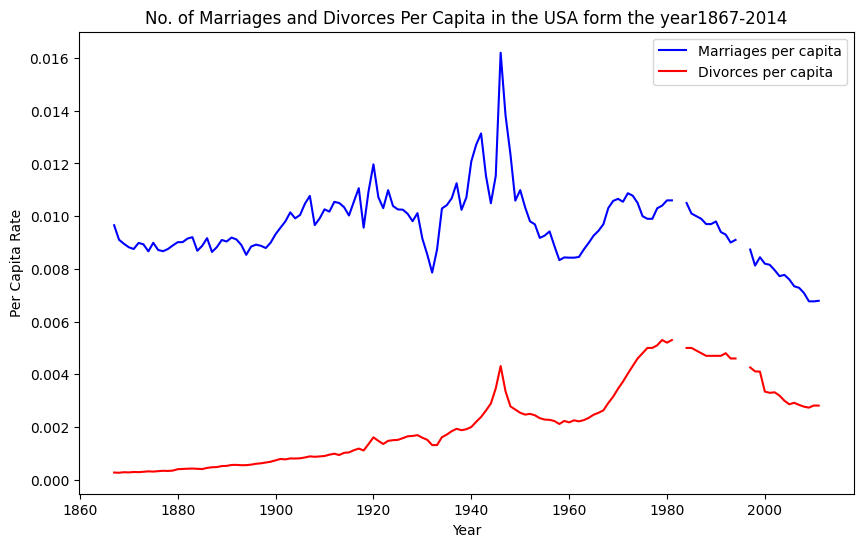

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

url = "E:/Downloads/us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(url)

data['Marriages_per_capita'] = data['Marriages'] / data['Population']
data['Divorces_per_capita'] = data['Divorces'] / data['Population']

plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Marriages_per_capita'], label='Marriages per capita', color='blue')
plt.plot(data['Year'], data['Divorces_per_capita'], label='Divorces per capita', color='red')

plt.xlabel('Year')
plt.ylabel('Per Capita Rate')
plt.title('No. of Marriages and Divorces Per Capita in the USA form the year1867-2014')
plt.legend()

plt.show()


Question 7

C:\Users\aasth\AppData\Local\Temp\ipykernel_2240\3019686507.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Marriages_per_capita'] = selected_data['Marriages'] / selected_data['Population']
C:\Users\aasth\AppData\Local\Temp\ipykernel_2240\3019686507.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Divorces_per_capita'] = selected_data['Divorces'] / selected_data['Population']


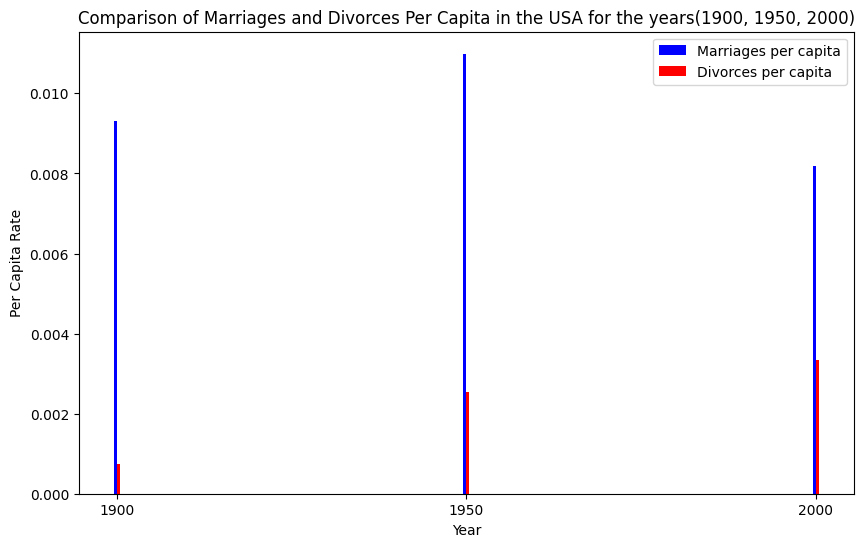

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

url = "E:/Downloads/us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(url)

selected_years = [1900, 1950, 2000]
selected_data = data[data['Year'].isin(selected_years)]

selected_data['Marriages_per_capita'] = selected_data['Marriages'] / selected_data['Population']
selected_data['Divorces_per_capita'] = selected_data['Divorces'] / selected_data['Population']

plt.figure(figsize=(10, 6))
plt.bar(selected_data['Year'] - 0.2, selected_data['Marriages_per_capita'], width=0.4, label='Marriages per capita', color='blue')
plt.bar(selected_data['Year'] + 0.2, selected_data['Divorces_per_capita'], width=0.4, label='Divorces per capita', color='red')

plt.xlabel('Year')
plt.ylabel('Per Capita Rate')
plt.title('Comparison of Marriages and Divorces Per Capita in the USA for the years(1900, 1950, 2000)')
plt.xticks(selected_data['Year'])
plt.legend()

plt.show()


Question 8

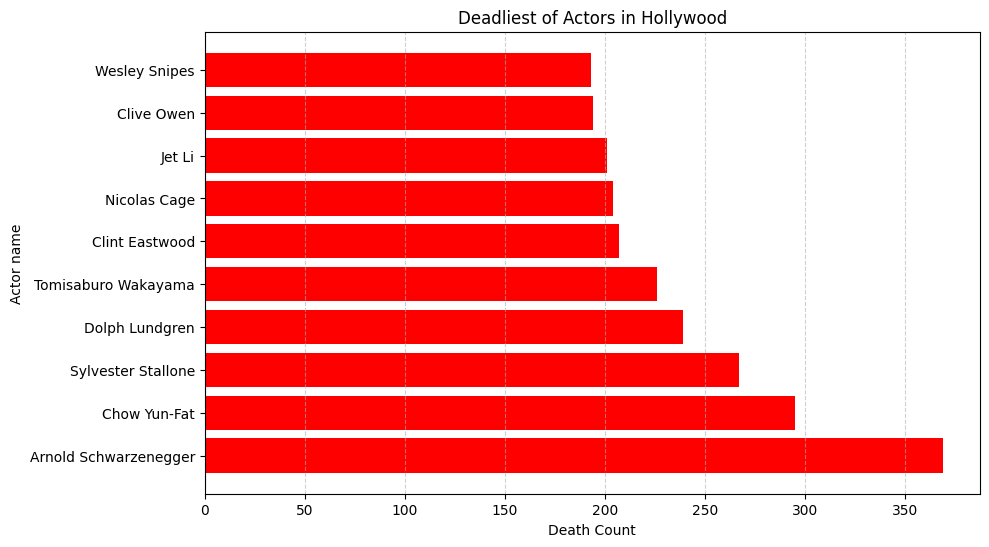

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

url = "E:/Downloads/actor_kill_counts.csv"
data = pd.read_csv(url)

sorted_data = data.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(sorted_data['Actor'], sorted_data['Count'], color='red')

plt.xlabel('Death Count')
plt.ylabel('Actor name')
plt.title('Deadliest of Actors in Hollywood')
plt.yticks(sorted_data['Actor'])
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()


Question 9

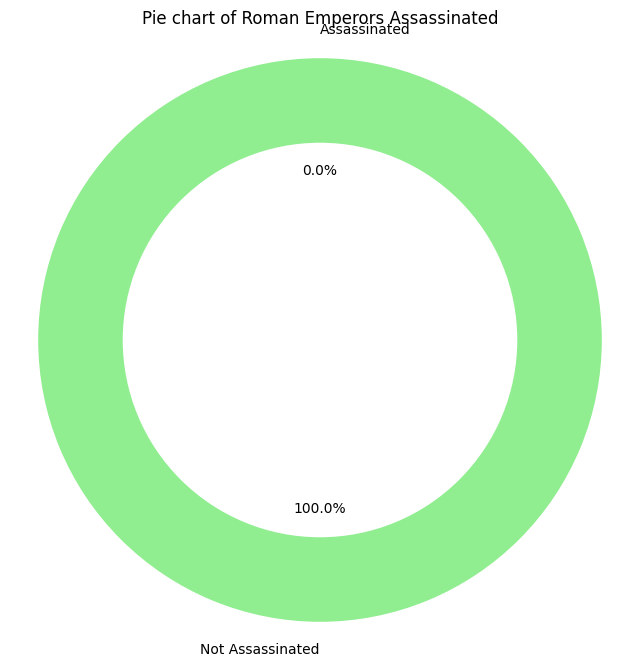

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

url = "E:/Downloads/roman-emperor-reigns.csv"
data = pd.read_csv(url)

assassinated_count = data[data['Cause_of_Death'] == 'Assassination'].shape[0]
not_assassinated_count = data.shape[0] - assassinated_count

plt.figure(figsize=(8, 8))
plt.pie([assassinated_count, not_assassinated_count],
        labels=['Assassinated', 'Not Assassinated'],
        autopct='%1.1f%%', startangle=90, colors=['red', 'lightgreen'])

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.title('Pie chart of Roman Emperors Assassinated')
plt.show()


Question 10

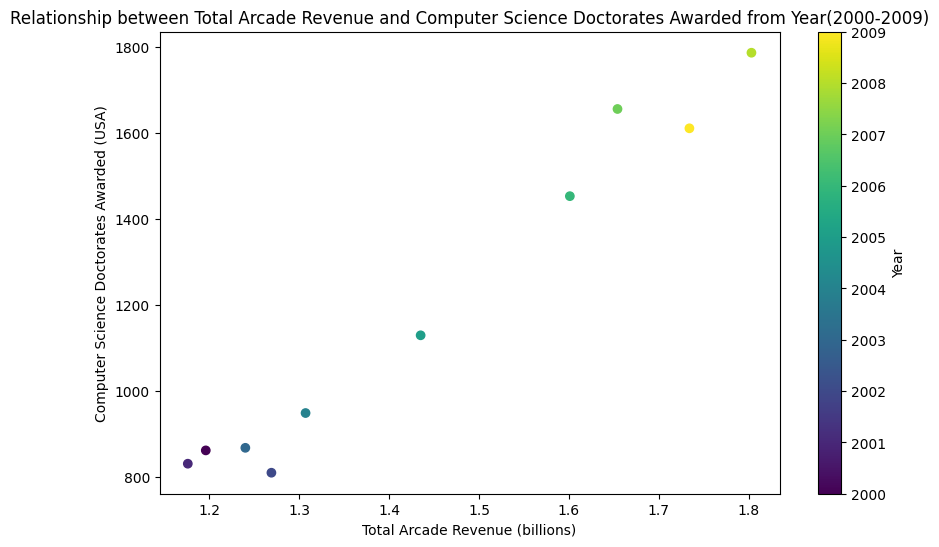

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

url = "E:/Downloads/arcade-revenue-vs-cs-doctorates.csv"
data = pd.read_csv(url)

filtered_data = data[(data['Year'] >= 2000) & (data['Year'] <= 2009)]
plt.figure(figsize=(10, 6))

scatter = plt.scatter(filtered_data['Total Arcade Revenue (billions)'], filtered_data['Computer Science Doctorates Awarded (US)'], c=filtered_data['Year'], cmap='viridis')

cbar = plt.colorbar(scatter)
cbar.set_label('Year')

plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (USA)')
plt.title('Relationship between Total Arcade Revenue and Computer Science Doctorates Awarded from Year(2000-2009)')

plt.show()
